In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Read Data

In [2]:
df_train = pd.read_csv('./data/train.csv')

In [3]:
#tickets = []
#for ticket in df_train["Ticket"].unique():
#    #print(ticket)
#    ticket_ = ticket.split()
#    if len(ticket_)=2:
#        tickets.append(ticket_)
#tickets

# Change Data

In [4]:
df_train.drop(["Name"], axis = 1, inplace=True)
df_train.drop(["Ticket"], axis = 1, inplace=True)
df_train.drop(["Cabin"], axis = 1, inplace=True)
df_train.drop(["PassengerId"],axis = 1, inplace=True)

In [5]:
df_train["Embarked"].fillna('S', inplace=True)

cat_columns = df_train.select_dtypes(['object']).columns
print(cat_columns)

df_train[cat_columns] = df_train.select_dtypes(['object']).apply(pd.Series.astype, dtype='category')
df_train[cat_columns]= df_train[cat_columns].apply(lambda x: x.cat.codes)

Index(['Sex', 'Embarked'], dtype='object')


In [6]:
#df_train.info()

In [7]:
#df_train["Embarked"].cat.codes

# Age

29.69911764705882


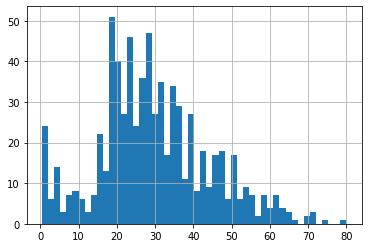

In [8]:
df_train["Age"].hist(bins = 50)
mean = df_train["Age"].mean()
print(mean)

In [9]:
df_train["Age"].fillna(df_train["Age"].mean(), inplace=True)

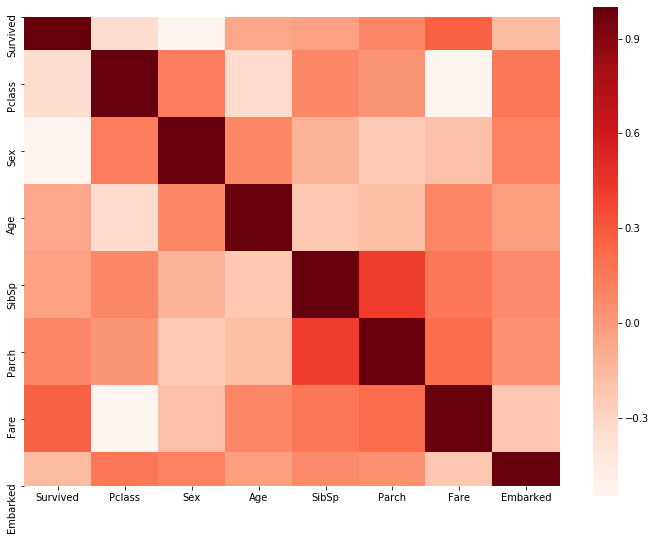

In [10]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True, cmap="Reds");

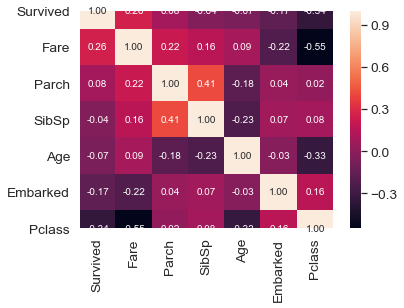

In [11]:
k = 7 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Survived')['Survived'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
labels_train = df_train["Survived"]
df_train = df_train.drop(["Survived"],axis = 1)

# Test data

In [14]:
df_test = pd.read_csv('./data/test.csv')

In [15]:
Id = df_test["PassengerId"]

In [16]:
df_test = df_test.drop(["Name"], axis = 1)
df_test = df_test.drop(["Ticket"], axis = 1)
df_test = df_test.drop(["Cabin"], axis = 1)
df_test = df_test.drop(["PassengerId"],axis = 1)

In [17]:
cat_columns = df_test.select_dtypes(['object']).columns
print(cat_columns)

df_test[cat_columns] = df_test.select_dtypes(['object']).apply(pd.Series.astype, dtype='category')

df_test[cat_columns]= df_test[cat_columns].apply(lambda x: x.cat.codes)

df_test["Age"].fillna(df_train["Age"].mean(), inplace=True)
df_test["Fare"].fillna(df_train["Fare"].mean(), inplace=True)

Index(['Sex', 'Embarked'], dtype='object')


# Models

## Decision Tree

Simple decision tree

In [55]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, # The depth of tree
                                  random_state=17)                  # Random state: 
                                                                    # thus we can obtain the
                                                                    # same results for 
                                                                    # for a new launch.

In [49]:
# training the tree
clf_tree.fit(df_train, labels_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=17, splitter='best')

In [50]:
predictions = clf_tree.predict(df_test) # Explanation below

## K-nearest neigbours

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

knn = KNeighborsClassifier(n_neighbors=5)
# for kNN, we need to scale features
scaler = StandardScaler() # Z value
X_train_scaled = scaler.fit_transform(df_train)
knn.fit(X_train_scaled, labels_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [69]:
predictions = knn.predict(df_test)

## RandomForest

In [74]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, 
                                random_state=17)

In [76]:
forest.fit(df_train, labels_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=17, verbose=0,
                       warm_start=False)

In [77]:
predictions = forest.predict(df_test)

## Model XGB

In [53]:
from sklearn.model_selection import train_test_split
df_train, data_val, label_train, label_val = train_test_split(df_train, labels_train, test_size=0.1,
                                                             random_state=2)

In [54]:
len(data_val)

90

In [55]:
import xgboost as xgb
dtrain = xgb.DMatrix(df_train, label=label_train)
dval = xgb.DMatrix(data_val, label=label_val)

C:\Users\Nuclear\Anaconda3\envs\env\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


### The best
    df_train, data_val, label_train, label_val = train_test_split(df_train, labels_train, test_size=0.1)
    num_round = 20 or 30
    param = {'booster': 'gbtree', 'max_depth':2, 'eta':1, 'silent':1,
         #"gamma":5,
         #'subsample':1,
         #'lambda': 0.1,
         #'tree_method':'hist',
         'objective':'binary:logistic'}

# Real parameters

In [56]:
param = {'booster': 'gbtree', 'max_depth':2, 'eta':1, 'silent':1,
         #"gamma":5,
         #'subsample':1,
         #'lambda': 0.01,
         #'tree_method':'hist',
         'objective':'binary:logistic'}

In [57]:
# specify validations set to watch performance
watchlist = [(dval, 'eval'), (dtrain, 'train')]
num_round = 30
bst = xgb.train(param, dtrain, num_round, watchlist, early_stopping_rounds=10)

[0]	eval-error:0.244444	train-error:0.203496
Multiple eval metrics have been passed: 'train-error' will be used for early stopping.

Will train until train-error hasn't improved in 10 rounds.
[1]	eval-error:0.222222	train-error:0.188514
[2]	eval-error:0.211111	train-error:0.166042
[3]	eval-error:0.211111	train-error:0.157303
[4]	eval-error:0.222222	train-error:0.151061
[5]	eval-error:0.222222	train-error:0.15231
[6]	eval-error:0.233333	train-error:0.149813
[7]	eval-error:0.233333	train-error:0.151061
[8]	eval-error:0.222222	train-error:0.146067
[9]	eval-error:0.222222	train-error:0.144819
[10]	eval-error:0.233333	train-error:0.138577
[11]	eval-error:0.255556	train-error:0.134831
[12]	eval-error:0.233333	train-error:0.128589
[13]	eval-error:0.244444	train-error:0.126092
[14]	eval-error:0.244444	train-error:0.127341
[15]	eval-error:0.244444	train-error:0.128589
[16]	eval-error:0.233333	train-error:0.124844
[17]	eval-error:0.244444	train-error:0.116105
[18]	eval-error:0.244444	train-error

In [58]:
#bst.best_iteration # For early stopping
#xgboost.train() will return a model from the last iteration, not the best one.
bst.best_ntree_limit #?

30

In [59]:
# this is prediction
preds = bst.predict(dval)
labels = dval.get_label()
print('error=%f' % (sum(1 for i in range(len(preds)) if int(preds[i] > 0.5) != labels[i]) / float(len(preds))))

error=0.244444


## Additional

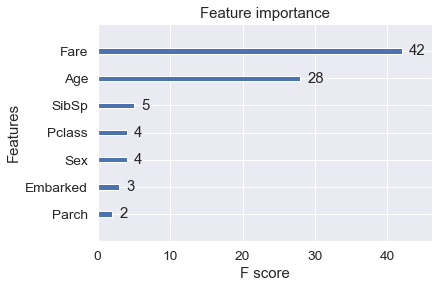

In [74]:
xgb.plot_importance(bst)

In [61]:
#xgb.to_graphviz(bst, num_trees=2)

# Predict

In [66]:
try:
    del out_data
except:
    pass

In [67]:
dtest = xgb.DMatrix(df_test)

In [68]:
predictions = bst.predict(dtest)

In [69]:
print(predictions.shape)

(418,)


<b>If not xgb, begin from here</b>

In [78]:
pred = np.where(predictions > 0.5, 1, 0)
pred.reshape((418,))
Id = np.array([Id])
Id = Id.reshape(418,)

In [79]:
out_data =  pd.DataFrame()
out_data["PassengerId"] = Id
out_data["Survived"] = pred

In [80]:
print(out_data)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         1
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]


In [81]:
out_data.to_csv("sub.csv", sep=',', encoding='utf-8', index = False)

# What to try

Grid search and other similar features

In [120]:
from scipy.stats import ks_2samp

In [122]:
ks_2samp?